📦 Importing Required Libraries
We begin by importing all the essential Python libraries for data loading, preprocessing, modeling, and evaluation.

In [1]:
import pandas as pd
import joblib
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

🗂️ Loading and Preparing the Dataset
In this section, we load the dataset and perform basic preprocessing steps to make it ready for model training.

In [2]:
# --- 1. Load and Prepare Data ---
print("Loading dataset...")
df = pd.read_csv("sentiment_dataset_50k.csv")

Loading dataset...


🧹 Dropping Missing Values
To ensure clean data, we remove all rows that contain any missing (NaN) values.

In [3]:
# Drop any potential missing values
df.dropna(subset=['text', 'sentiment'], inplace=True)
df.reset_index(drop=True, inplace=True)

🧠 Preparing Data: Encoding Sentiment Labels
We convert sentiment categories into numeric labels for model training.

In [4]:
# Encode labels
print("Preparing data...")
df['label'] = df['sentiment'].astype('category')
label_mapping = dict(enumerate(df['label'].cat.categories))
df['label'] = df['label'].cat.codes

Preparing data...


🧪 Train-Test Split
We split the dataset into training and testing sets to evaluate model performance effectively.

In [5]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

🧱 Creating a Machine Learning Pipeline
We use a Scikit-learn Pipeline to streamline the process of converting text into features and training a classifier.

In [6]:
# --- 2. Build and Tune the Model ---
print("Building pipeline...")
# We use TfidfVectorizer as it often performs better than CountVectorizer
pipeline = make_pipeline(TfidfVectorizer(), MultinomialNB())

Building pipeline...


🔍 Hyperparameter Tuning with GridSearchCV
We use GridSearchCV to find the best combination of hyperparameters for our model. It performs an exhaustive search over a specified parameter grid using cross-validation.

In [7]:
# Define a parameter grid for GridSearchCV
# This will test different combinations of parameters to find the best ones.
param_grid = {
    'tfidfvectorizer__ngram_range': [(1, 1), (1, 2)], # Test unigrams and bigrams
    'tfidfvectorizer__max_df': [0.9, 0.95],          # Ignore words that appear too frequently
    'multinomialnb__alpha': [0.1, 0.5, 1.0],          # Smoothing parameter
}

In [8]:
print("Starting hyperparameter tuning with GridSearchCV...")
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Starting hyperparameter tuning with GridSearchCV...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


,estimator,Pipeline(step...inomialNB())])
,param_grid,"{'multinomialnb__alpha': [0.1, 0.5, ...], 'tfidfvectorizer__max_df': [0.9, 0.95], 'tfidfvectorizer__ngram_range': [(1, ...), (1, ...)]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,input,'content'


In [9]:
# Get the best model from the grid search
best_model = grid_search.best_estimator_

In [10]:
print("\n--- Best Parameters Found ---")
print(grid_search.best_params_)


--- Best Parameters Found ---
{'multinomialnb__alpha': 0.1, 'tfidfvectorizer__max_df': 0.9, 'tfidfvectorizer__ngram_range': (1, 1)}


In [11]:
# --- 3. Evaluate the Best Model ---
print("\n--- Model Evaluation on Test Set ---")
y_pred = best_model.predict(X_test)


--- Model Evaluation on Test Set ---


📊 Model Evaluation
After training the model, we evaluate its performance using various metrics on the test dataset.

In [12]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_mapping.values(), output_dict=True)

In [13]:
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_mapping.values()))

Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      2989
     neutral       1.00      1.00      1.00      3028
    positive       1.00      1.00      1.00      3983

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



🔄 Confusion Matrix
The confusion matrix is a table that describes the performance of a classification model on a set of test data.

Generating confusion matrix plot...
Saved confusion_matrix.png


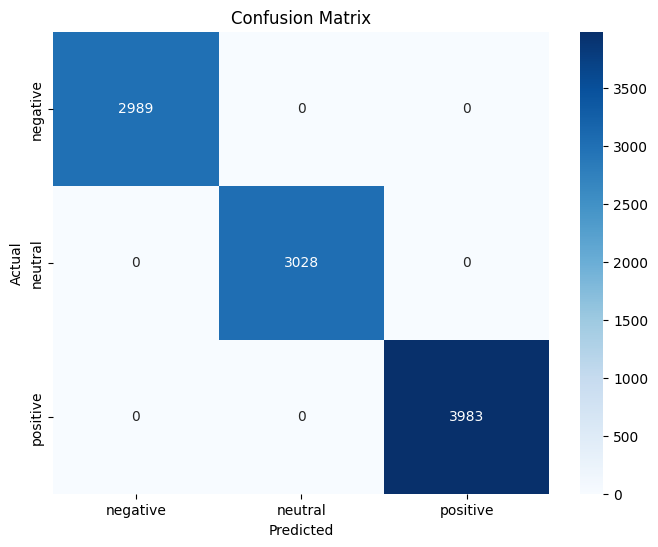

In [14]:
# --- 4. Generate and Save Confusion Matrix Plot ---
print("Generating confusion matrix plot...")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_mapping.values(), yticklabels=label_mapping.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
print("Saved confusion_matrix.png")

💾 Saving the Trained Model (Pickle Format)
Once the model is trained and evaluated, we can save it for later use using Python’s pickle module.



In [15]:
# --- 5. Save Artifacts ---
print("\nSaving model and artifacts...")
# Save the trained model
joblib.dump(best_model, 'model.pkl')


Saving model and artifacts...


['model.pkl']

In [16]:
# Save the label mapping
joblib.dump(label_mapping, 'label_mapping.pkl')

['label_mapping.pkl']

In [17]:
# Save performance metrics to a JSON file
performance_metrics = {
    'accuracy': accuracy,
    'classification_report': report
}
with open('performance_metrics.json', 'w') as f:
    json.dump(performance_metrics, f, indent=4)

✅ Model Trained and Saved Successfully
We have completed the model training process and saved the trained pipeline using the pickle module.



In [18]:
print("\nModel training and saving process completed successfully!")


Model training and saving process completed successfully!
